# Alejandro Jesús Manotas Marmolejo
# Código: 200108289

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Distribution for Running Data Analysis
from scipy.stats import poisson

#Model imports
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier

#Clustering imports
from sklearn.cluster import KMeans

#Model metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# 1. Running data analysis

Dataset: [Runkeeper data](https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/cardioActivities.csv)

In [ ]:
#Read CSV
runkeeper_data = pd.read_csv('/content/drive/MyDrive/Runkeeper_data.csv')
runkeeper_data.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [ ]:
#Erasing columns we don't need
runkeeper_data = runkeeper_data.drop(columns=['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes'])
runkeeper_data.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [ ]:
# Erase nan rows
runkeeper_data.dropna(subset = ['Type','Distance (km)', 'Duration', 'Average Pace', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'], axis=0,inplace=True)

## Visualizing data

In [ ]:
#Convert duration from type string to integer, duration is gonna be in minutes
def convert_to_minutes(duration):
  duration = duration.split(':')
  minutes = 0
  if len(duration) == 3:
    minutes += (int(duration[0]) * 60)
    minutes += int(duration[1])
    minutes += (int(duration[2]) / 60)
  else:
    minutes += int(duration[0])
    minutes += (int(duration[1]) / 60)
  return minutes

runkeeper_data.loc[:, 'Duration'] = runkeeper_data['Duration'].apply(lambda duration: convert_to_minutes(duration))

In [ ]:
#See if dataframe is correct
runkeeper_data.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58.666667,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,74.200000,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,75.266667,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,74.416667,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,72.833333,5:36,10.73,170,154.0


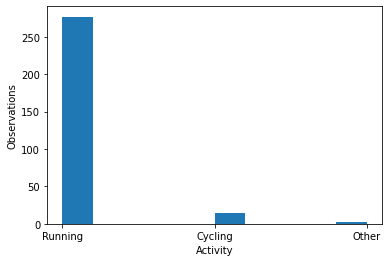

In [ ]:
#Histogram based on type of activity
type_hist = plt.hist(runkeeper_data['Type'])
type_hist = plt.xlabel('Activity')
type_hist = plt.ylabel('Observations')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

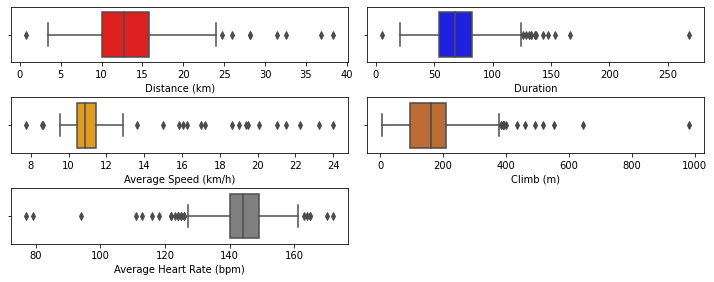

In [ ]:
r = plt.figure(figsize=(10,4))

#Distance (km) boxplot
r.add_subplot(3,2,1)
sns.boxplot(runkeeper_data['Distance (km)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Duration boxplot
r.add_subplot(3,2,2)
sns.boxplot(runkeeper_data['Duration'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Speed (km/h) boxplot
r.add_subplot(3,2,3)
sns.boxplot(runkeeper_data['Average Speed (km/h)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Climb (m) boxplot
r.add_subplot(3,2,4)
sns.boxplot(runkeeper_data['Climb (m)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Heart Rate (bpm) boxplot
r.add_subplot(3,2,5)
sns.boxplot(runkeeper_data['Average Heart Rate (bpm)'],color='gray')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

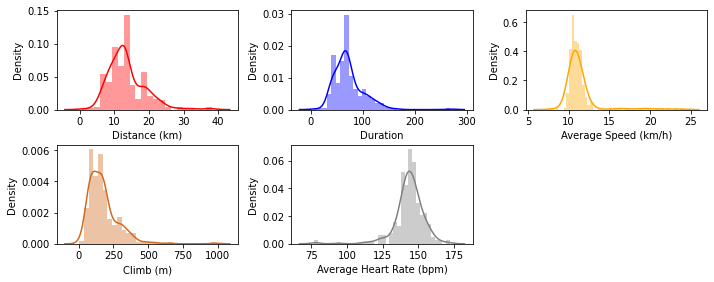

In [ ]:
r2 = plt.figure(figsize=(10,4))

#Distance (km) distplot
r2.add_subplot(2,3,1)
sns.distplot(runkeeper_data['Distance (km)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Duration distplot
r2.add_subplot(2,3,2)
sns.distplot(runkeeper_data['Duration'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Speed (km/h) distplot
r2.add_subplot(2,3,3)
sns.distplot(runkeeper_data['Average Speed (km/h)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Climb (m) distplot
r2.add_subplot(2,3,4)
sns.distplot(runkeeper_data['Climb (m)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Heart Rate (bpm) distplot
r2.add_subplot(2,3,5)
sns.distplot(runkeeper_data['Average Heart Rate (bpm)'],color='gray')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

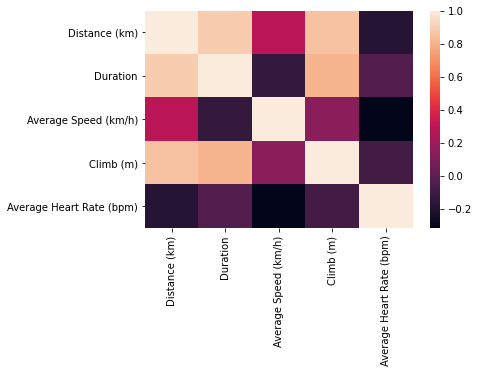

In [ ]:
#Heatmap
sns.heatmap(runkeeper_data.corr())
plt.show()

## Probability function

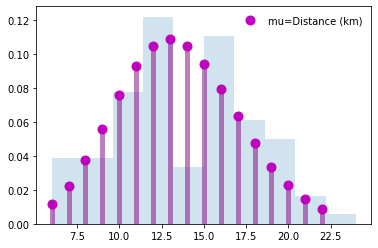

In [ ]:
#Expected value vs Observed value
#Create figure
fig, ax = plt.subplots(1, 1)

#Parameters for distribution
mu = runkeeper_data['Distance (km)'].mean()

#Generate the discrete random variables
x = np.arange(poisson.ppf(0.01,mu), poisson.ppf(0.99,mu))

#Plotting x
ax.plot(x, poisson.pmf(x,mu), 'mo', ms=9, label='mu=Distance (km)')
ax.vlines(x, 0, poisson.pmf(x,mu), colors='purple', lw=5, alpha=0.5)

#Generate random numbers and plotting
x_rv = poisson.rvs(mu, size=100)
ax.hist(x_rv, density=True, alpha=0.2)

#Define legends of the attributes
ax.legend(loc='upper right', frameon=False)
plt.show()

## Data analysis

### Cual es la probabilidad de correr una distancia de 10 km?

In [ ]:
#Probability to run 10km
print(poisson.pmf(10,mu))

0.07589751038167286


### Cual es la probabilidad de correr una distancia mayor a 15 km?

In [ ]:
#Probability to run more than 15km
more_than_15_km = 0
for i in range (0,16):
    more_than_15_km = poisson.pmf(i,mu) + more_than_15_km
print(1 - more_than_15_km)

0.2825191136083811


## Conclusiones

Utilizando la distribución de probabilidad de Poisson realizando los cálculos para el calculo de la probabilidad de las preguntas hechas tenemos que la probabilidad de recorrer una distancia de 10km es de 0.07589751038167286, en cuanto a la probabilidad de recorrer una distancia mayor a 15km realizado el cálculo se tiene que es de 0.2825191136083811

# 2. COVID-19 Mobile Testing/Vaccinations sites

Dataset: [Covid data](https://learngis2.maps.arcgis.com/home/item.html?id=68828d36d80045599fde40fcd859a56c&sublayer=0&view=list&sortOrder=desc&sortField=defaultFSOrder#data)

In [ ]:
#Read CSV
covid_data = pd.read_excel('/content/drive/MyDrive/CovidBQ.xlsx')
covid_data.head()

,Barrio,Localidad,Casos Historicos,Casos Activos
0,LAS GRANJAS,Metropolitana,6,1
1,VILLA DEL CARMEN,SURORIENTE,28,0
2,7 DE ABRIL,Metropolitana,615,19
3,20 DE JULIO,Metropolitana,82,4
4,BELLA ARENA,SURORIENTE,137,1


In [ ]:
covid_data['Longitud'] = ''
covid_data['Latitud'] = ''
covid_data['Barrio'] = covid_data['Barrio']+', Barranquilla, Colombia'
covid_data = covid_data.reset_index(drop=True)
covid_data.head()

,Barrio,Localidad,Casos Historicos,Casos Activos,Longitud,Latitud,Barrios
0,"LAS GRANJAS, Barranquilla, Colombia",Metropolitana,6,1,,,"LAS GRANJAS, Barranquilla, Colombia"
1,"VILLA DEL CARMEN, Barranquilla, Colombia",SURORIENTE,28,0,,,"VILLA DEL CARMEN, Barranquilla, Colombia"
2,"7 DE ABRIL, Barranquilla, Colombia",Metropolitana,615,19,,,"7 DE ABRIL, Barranquilla, Colombia"
3,"20 DE JULIO, Barranquilla, Colombia",Metropolitana,82,4,,,"20 DE JULIO, Barranquilla, Colombia"
4,"BELLA ARENA, Barranquilla, Colombia",SURORIENTE,137,1,,,"BELLA ARENA, Barranquilla, Colombia"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


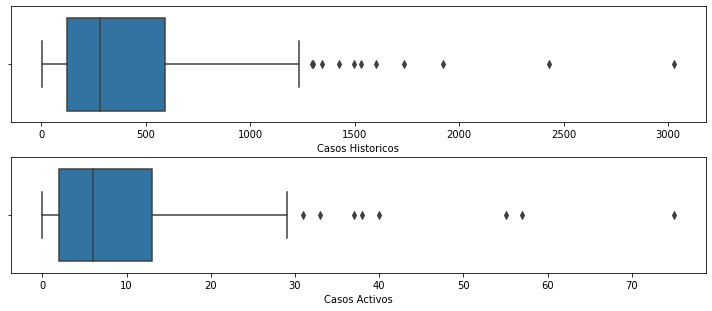

In [ ]:
c = plt.figure(figsize=(10,4))

c.add_subplot(2,1,1)
sns.boxplot(covid_data['Casos Historicos'])
plt.tight_layout(h_pad=0.4)


c.add_subplot(2,1,2)
sns.boxplot(covid_data['Casos Activos'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


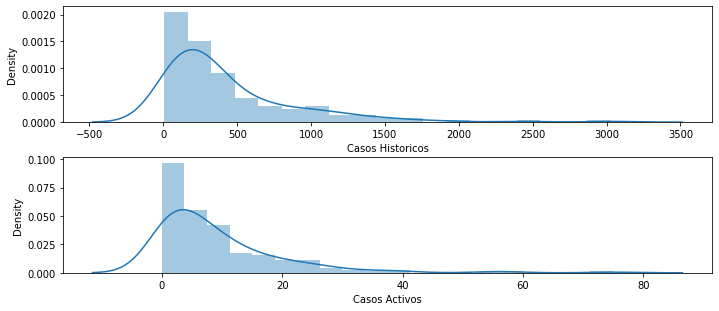

In [ ]:
c1 = plt.figure(figsize=(10,4))

c1.add_subplot(2,1,1)
sns.distplot(covid_data['Casos Historicos'])
plt.tight_layout(h_pad=0.4)


c1.add_subplot(2,1,2)
sns.distplot(covid_data['Casos Activos'])

plt.show()

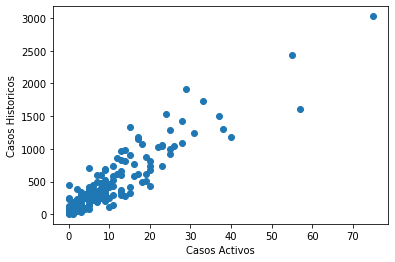

In [ ]:
plt.scatter(x='Casos Activos', y ='Casos Historicos', data=covid_data)
plt.xlabel('Casos Activos')
plt.ylabel('Casos Historicos')
plt.show()

In [ ]:
covid = covid_data.drop(columns=['Barrio','Localidad'])
covid.head()

,Casos Historicos,Casos Activos
0,6,1
1,28,0
2,615,19
3,82,4
4,137,1


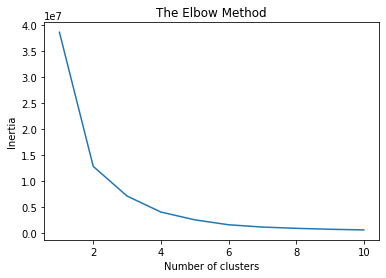

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 69)
    kmeans.fit(covid)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(covid)

In [ ]:
covid = covid.iloc[:, [0, 1]].values

AttributeError: ignored

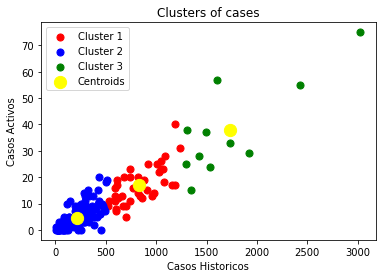

In [ ]:
plt.scatter(covid[y_kmeans == 0, 0], covid[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(covid[y_kmeans == 1, 0], covid[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(covid[y_kmeans == 2, 0], covid[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cases')
plt.xlabel('Casos Historicos')
plt.ylabel('Casos Activos')
plt.legend()
plt.show()

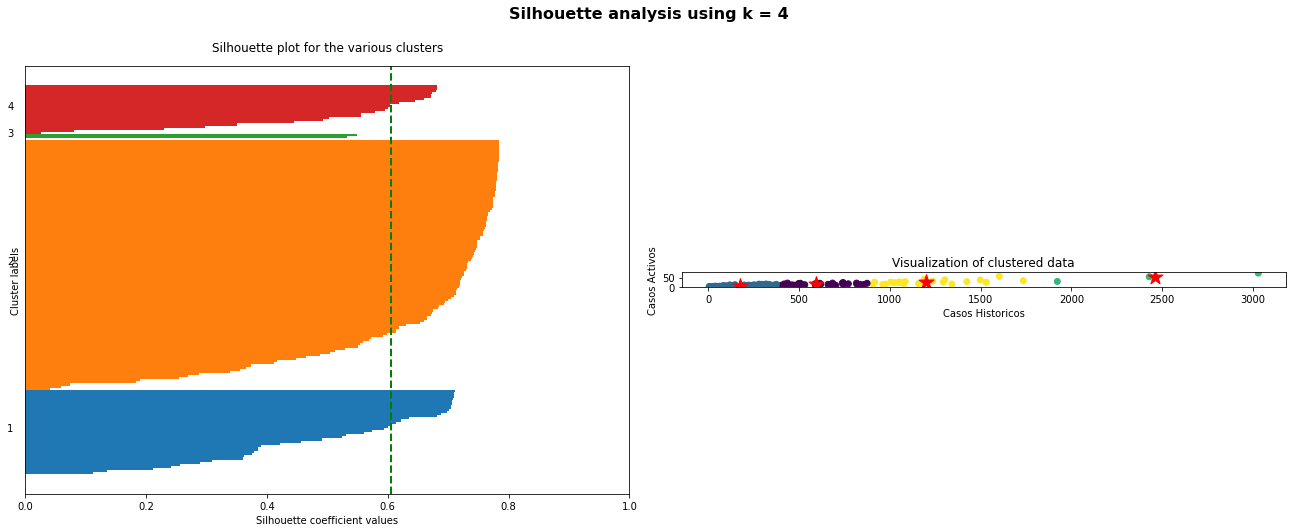

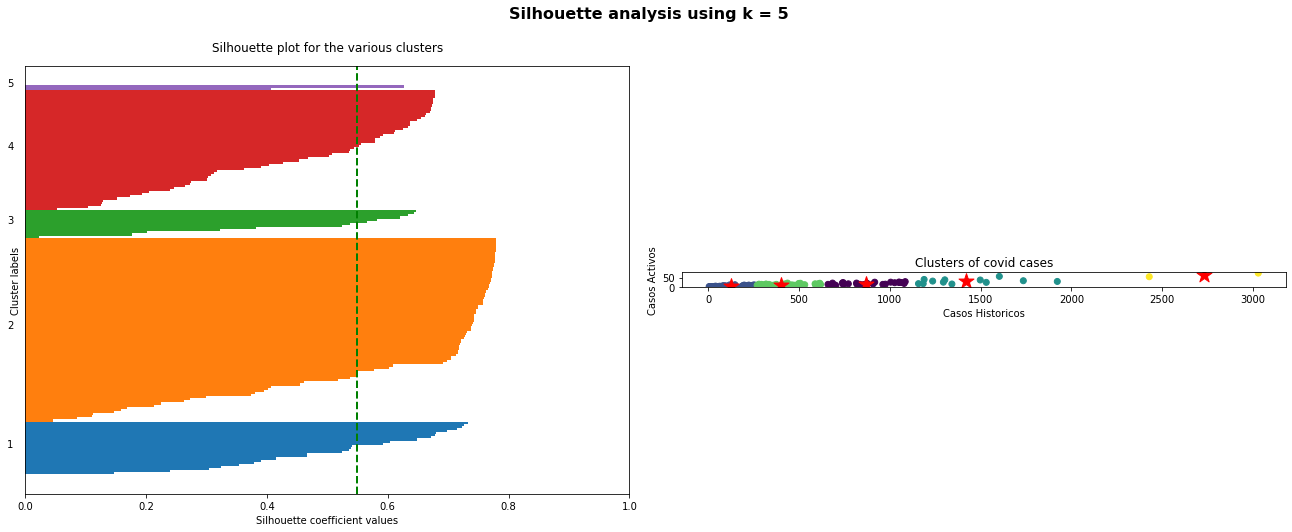

In [ ]:
for i, k in enumerate([4,5]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(covid)
    centroids = km.cluster_centers_

    # Get silhouette samples - coefficients
    silhouette_vals = silhouette_samples(covid, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0

    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([0, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(covid[:, 0], covid[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('Casos Historicos')
    ax2.set_ylabel('Casos Activos')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05);
    

plt.title('Clusters of covid cases')
plt.xlabel('Casos Historicos')
plt.ylabel('Casos Activos')
plt.show()

# 3. Transit accidents severity

Dataset: [US Accidents](https://www.kaggle.com/sobhanmoosavi/us-accidents?select=US_Accidents_June20.csv)

In [ ]:
#Read csv
accident_data = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec20_Updated.csv')
accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#Factorize weather condition data
accident_data['Weather_Condition'],weather_data = pd.factorize(accident_data['Weather_Condition'])

#Selecting the columns we need and erasing nans
accidents = accident_data.loc[:, ['Temperature(F)', 'Humidity(%)','Pressure(in)','Visibility(mi)','Precipitation(in)', 'Weather_Condition', 'Severity']].dropna()

In [ ]:
#See if the dataframe is correct
accidents.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Precipitation(in),Weather_Condition,Severity
0,76.0,52.0,28.91,10.0,0.0,0,2
1,76.0,62.0,29.30,10.0,0.0,1,2
2,51.0,80.0,30.17,10.0,0.0,0,2
6,28.0,88.0,24.67,2.0,0.0,4,4
7,55.0,40.0,29.86,10.0,0.0,0,2


## Visualizing data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

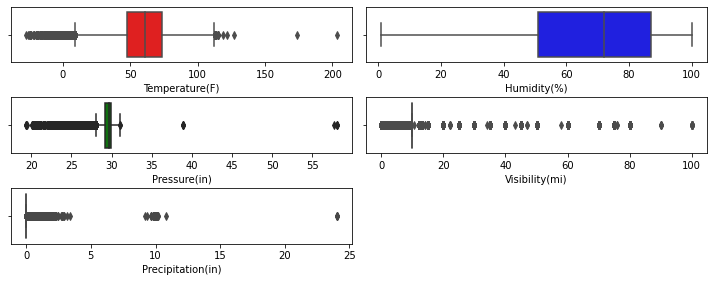

In [ ]:
f = plt.figure(figsize=(10,4))

#Temperature boxplot
f.add_subplot(3,2,1)
sns.boxplot(accidents['Temperature(F)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Humidity boxplot
f.add_subplot(3,2,2)
sns.boxplot(accidents['Humidity(%)'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Pressure boxplot
f.add_subplot(3,2,3)
sns.boxplot(accidents['Pressure(in)'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Visibility boxplot
f.add_subplot(3,2,4)
sns.boxplot(accidents['Visibility(mi)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Precipitation boxplot
f.add_subplot(3,2,5)
sns.boxplot(accidents['Precipitation(in)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

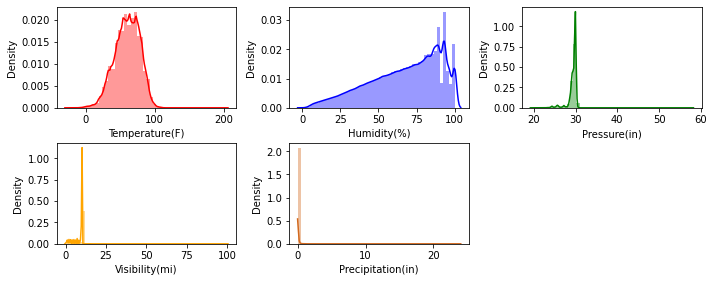

In [ ]:
f2 = plt.figure(figsize=(10,4))

#Temperature distplot
f2.add_subplot(2,3,1)
sns.distplot(accidents['Temperature(F)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Humidity distplot
f2.add_subplot(2,3,2)
sns.distplot(accidents['Humidity(%)'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Pressure distplot
f2.add_subplot(2,3,3)
sns.distplot(accidents['Pressure(in)'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Visibility distplot
f2.add_subplot(2,3,4)
sns.distplot(accidents['Visibility(mi)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Precipitation distplot
f2.add_subplot(2,3,5)
sns.distplot(accidents['Precipitation(in)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

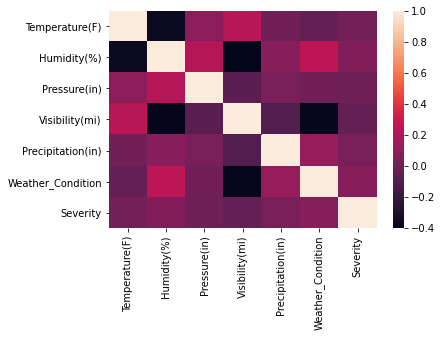

In [ ]:
#Heatmap
sns.heatmap(accidents.corr())
plt.show()

## Classification Models

### Naïve Bayes

In [ ]:
#Using Naive Bayes model
nb = GaussianNB()

#Split data into features and outputs
X = accidents.drop(columns=['Severity'])
Y = accidents['Severity']

#Split data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=13)

#Training the model
nb.fit(X_train,Y_train)

#Predict testing set
Y_pred = nb.predict(X_test)

#Check performance of model
print("Accuracy:",accuracy_score(Y_test,Y_pred))
#Model precision
print("Precision:",precision_score(Y_test,Y_pred , average='micro'))

Accuracy: 0.748360340115013
Precision: 0.748360340115013


### Decision Trees

In [ ]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Create variable x and y
X1 = accidents.drop(columns=['Severity'])
Y1 = accidents['Severity']

# Training the Decision Tree - Can split the data here for training
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=13)

#config = {'algorithm': 'ID3'}
clf_train = clf.fit(X1_train, Y1_train)

#Predict testing set
Y1_pred = clf.predict(X1_test)

#Check performance of model
print("Accuracy:",accuracy_score(Y1_test,Y1_pred))
#Model precision
print("Precision:",precision_score(Y1_test,Y1_pred , average='micro'))

Accuracy: 0.7488748051029877
Precision: 0.7488748051029877


### K-Nearest Neighbors

In [ ]:
#Create variable x and y
X2 = accidents.drop(columns=['Severity'])
Y2 = accidents['Severity']

#Split data into training and testing data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=13)

#Create model
knn = KNeighborsClassifier(n_neighbors=3)

#Training the model
knn.fit(X2_train, Y2_train)

#Model test
Y2_pred = knn.predict(X2_test) 
    
#Accuracy
print('Accuracy: ', accuracy_score(Y2_test,Y2_pred))
#Precision
print("Precision: ",precision_score(Y2_test,Y2_pred , average='micro'))

Accuracy:  0.7483414027534924
Precision:  0.7483414027534924


## Conclusiones

Entre los tres modelos presentan un score de precisión similar, bastante cercanos, el decision trees es el que presenta un mayor coeficiente de precisión, seguido del Naïve Bayes y por último el K-Nearest Neighboors. Por lo que es mejor utilizar Decision Trees.